### Data Collection and Data Exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
data = pd.read_csv('C://Users//PC//Downloads//Machine Learning Module//ipl.csv')

In [5]:
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [7]:
data.shape

(76014, 15)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


### Data Processing

#### Data Cleaning And filtering

In [6]:
data = data.drop(columns=['mid','venue','batsman','bowler','striker','non-striker'])

In [15]:
data.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [8]:
consistent_teams = ['Chennai Super Kings', 'Mumbai Indians', 'Kolkata Knight Riders', 'Royal Challengers Bangalore',
                   'Kings XI Punjab','Delhi Daredevils','Sunrisers Hyderabad','Rajasthan Royals']
data = data[data['bat_team'].isin(consistent_teams) & data['bowl_team'].isin(consistent_teams)]


In [30]:
data.shape

(53811, 9)

In [10]:
data = data[data['overs']>5]

In [40]:
data.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [12]:
data["date"] = pd.to_datetime(data["date"])

In [14]:
data.dtypes

date              datetime64[ns]
bat_team                  object
bowl_team                 object
runs                       int64
wickets                    int64
overs                    float64
runs_last_5                int64
wickets_last_5             int64
total                      int64
dtype: object

In [ ]:
# Checking missing and duplicate values

In [54]:
data.isnull().sum()

date              0
bat_team          0
bowl_team         0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
total             0
dtype: int64

In [58]:
data.duplicated().sum()

0

#### Feature Selection

In [66]:
relevant_cols = ["runs", "wickets", "overs", "runs_last_5", "wickets_last_5", "total"]
cor = data[relevant_cols].corr()

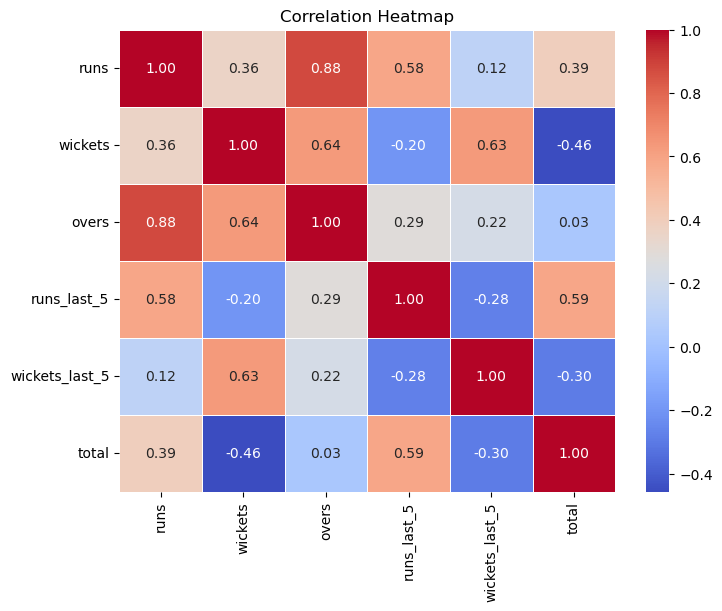

In [68]:
plt.figure(figsize=(8, 6))
sns.heatmap(cor, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#### Encoding Categorical Features

In [18]:
data = pd.get_dummies(data, columns=["bat_team", "bowl_team"], drop_first=True,dtype=int)

In [20]:
data.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,...,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0


#### Splitting Data into Training and Testing Sets

In [76]:
X = data.drop(columns=['date','total'])
y=data['total']

In [100]:
X_train = X[data["date"].dt.year <= 2016]
X_test = X[data["date"].dt.year == 2017]
y_train = y[data["date"].dt.year <= 2016]
y_test = y[data["date"].dt.year == 2017]

### Model Training

In [108]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

linear = LinearRegression()
linear.fit(X_train,y_train)

y_pred_lr = linear.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print(f"MAE: {mae_lr:.2f}")
print(f"MSE: {mse_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")


MAE: 12.12
MSE: 251.01
RMSE: 15.84


In [110]:
# Decision tree
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

y_pred_d = tree.predict(X_test)

mae_d = mean_absolute_error(y_test, y_pred_d)
mse_d = mean_squared_error(y_test, y_pred_d)
rmse_d = np.sqrt(mse_d)

print(f"MAE: {mae_d:.2f}")
print(f"MSE: {mse_d:.2f}")
print(f"RMSE: {rmse_d:.2f}")


MAE: 16.12
MSE: 480.61
RMSE: 21.92


In [112]:
# Random Forest Tree
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

random = RandomForestRegressor(n_estimators=100, random_state=42)
random.fit(X_train, y_train)


y_pred_rf = random.predict(X_test)


mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)


print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")



MAE: 13.87
MSE: 338.49
RMSE: 18.40


In [202]:
# AdaBoostRegressor

ab_model = AdaBoostRegressor(estimator =LinearRegression(), n_estimators=100,learning_rate=0.05 ,random_state=42)
ab_model.fit(X_train, y_train)


y_pred_ab = ab_model.predict(X_test)


mae_ab = mean_absolute_error(y_test, y_pred_ab)
mse_ab = mean_squared_error(y_test, y_pred_ab)
rmse_ab = np.sqrt(mse_ab)

print(f"MAE: {mae_ab:.2f}")
print(f"MSE: {mse_ab:.2f}")
print(f"RMSE: {rmse_ab:.2f}")



MAE: 12.10
MSE: 244.69
RMSE: 15.64


#### Final Model Selection

##### If we compare values or metrics Linear Regression and AdaBoost has least values. 
##### AdaBoost was applied on base linear regression to improve performance but there are not significant change.
##### So at last **Linear Regression model** can be choosen for better performance and simplicity.
